In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

ModuleNotFoundError: No module named 'gspread'

In [1]:
months = ['July', 'August', 'September', 'October']
data = {}
for month in months:
  worksheet = gc.open(month).sheet1
  rows = worksheet.get_all_values()
  data[month] = pd.DataFrame.from_records(rows[1:])
  data[month].columns = rows[0]

NameError: name 'gc' is not defined

In [16]:
worksheet = gc.open('All Months').sheet1
rows = worksheet.get_all_values()
allMonths = pd.DataFrame.from_records(rows[1:])
allMonths.columns = rows[0]

In [17]:
allMonths[:]

,Date,Contract,Units,$Volume,LowPrice,HighPrice,AvgPrice,LastPrice
0,05/01/00,Dem,224,112.043,0.49,0.55,0.5,0.55
1,05/01/00,Reform,2,0.067,0.019,0.048,0.034,0.019
2,05/01/00,Rep,116,57.95,0.488,0.501,0.5,0.5
3,05/02/00,Dem,87,44.369,0.501,0.522,0.51,0.508
4,05/02/00,Reform,50,0.196,0.003,0.005,0.004,0.003
...,...,...,...,...,...,...,...,...
541,10/30/00,Reform,80,0.006,0,0.001,0,0
542,10/30/00,Rep,"1,083",707.91,0.61,0.686,0.654,0.61
543,10/31/00,Dem,"1,246",474.869,0.36,0.399,0.381,0.377
544,10/31/00,Reform,1,0,0,0.001,0,0


In [64]:
cols = allMonths.columns

Index(['Date', 'Contract', 'Units', '$Volume', 'LowPrice', 'HighPrice',
       'AvgPrice', 'LastPrice', '5MA', '3MA'],
      dtype='object')


In [19]:
for col in cols[2:]:
  for i in range(len(allMonths[col])):
    if allMonths[col][i] != "":
      allMonths[col][i] = str(allMonths[col][i])
      allMonths[col][i] = (allMonths[col][i]).replace(',','')
      allMonths[col][i] = float(allMonths[col][i])
    else:
      allMonths[col][i] = 0 
      # this does not affect our calculated values because there are no missing values in the LastPrice column 

In [20]:
normPrices = []
dates = []

In [21]:
i = 1
while i < len(allMonths):
  dates.append(allMonths['Date'][i])
  bush = allMonths['LastPrice'][i+1] # Bush ~ Rep
  gore = allMonths['LastPrice'][i-1] # Gore ~ Dem
  
  # normalization formula from paper
  normPrice = gore / (bush + gore)
  normPrices.append(normPrice)
  i = i + 3

In [22]:
print(normPrices)

[0.5238095238095238, 0.5049701789264414, 0.5094905094905096, 0.5114656031904287, 0.5208747514910537, 0.5150602409638554, 0.5150602409638554, 0.5115346038114343, 0.51, 0.5, 0.4955401387512389, 0.49648946840521563, 0.49748743718592964, 0.4994994994994995, 0.4964824120603015, 0.48484848484848486, 0.49504950495049505, 0.46896551724137925, 0.4460093896713615, 0.48821218074656186, 0.48, 0.4833836858006042, 0.4779116465863454, 0.4679802955665024, 0.4773869346733668, 0.5024630541871921, 0.502415458937198, 0.5201177625122669, 0.5153617443012884, 0.49253731343283585, 0.4974721941354904, 0.49899799599198397, 0.5015045135406219, 0.49603174603174605, 0.5009842519685039, 0.4985044865403788, 0.5025125628140703, 0.54, 0.5150631681243927, 0.519730510105871, 0.511, 0.511, 0.5252725470763132, 0.5294117647058825, 0.5229540918163673, 0.5297029702970297, 0.5252225519287833, 0.5134061569016881, 0.5237623762376238, 0.5151515151515151, 0.5024630541871921, 0.504950495049505, 0.504950495049505, 0.511022044088176

In [25]:
data = pd.DataFrame(columns=['Date', 'Norm Price'])

In [27]:
data['Date'] = dates
data['Norm Price'] = normPrices

In [35]:
data['5MA'] = data['Norm Price'].rolling(5).mean()
data['3MA'] = data['Norm Price'].rolling(3).mean()
data['Diff'] = data['Norm Price'] - data['Norm Price'].shift(1)

In [36]:
data[:]

,Date,Norm Price,5MA,3MA,Diff
0,05/01/00,0.523810,NaN,NaN,NaN
1,05/02/00,0.504970,NaN,NaN,-0.018839
2,05/03/00,0.509491,NaN,0.512757,0.004520
3,05/04/00,0.511466,NaN,0.508642,0.001975
4,05/05/00,0.520875,0.514122,0.513944,0.009409
...,...,...,...,...,...
177,10/27/00,0.384310,0.415059,0.409870,-0.033690
178,10/28/00,0.296488,0.395575,0.366266,-0.087822
179,10/29/00,0.345703,0.374360,0.342167,0.049216
180,10/30/00,0.380711,0.365042,0.340967,0.035008


Text(0, 0.5, 'Normalized Price')

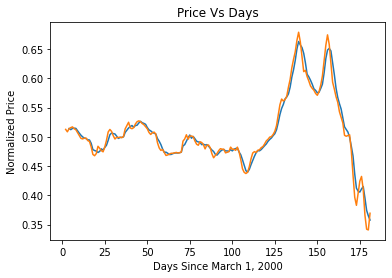

In [57]:
data['5MA'].plot(kind="line")
ax = data['3MA'].plot(kind="line", title="Price Vs Days")

ax.set_xlabel("Days Since March 1, 2000")
ax.set_ylabel("Normalized Price")